### ABOUT COLUMNS

age: age of primary beneficiary

sex: insurance contractor gender, female, male

bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

children: Number of children covered by health insurance / Number of dependents

smoker: Smoking

region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

charges: Individual medical costs billed by health insurance

#### PROJECT AIM

The goal of this project is to predict the insurance cost of the patients given the columns above.



In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import warnings 
warnings.filterwarnings('ignore')
sns.set(rc={'figure.figsize':(10,6)})

In [2]:
med=pd.read_csv('insurance.csv')

In [3]:
med.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
med.shape

(1338, 7)

In [6]:
med.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
med.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


from the description of the dataset we can deduce the mean age is 39, the minimum age is 18years, the maximum age is 64 years



In [8]:
med.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

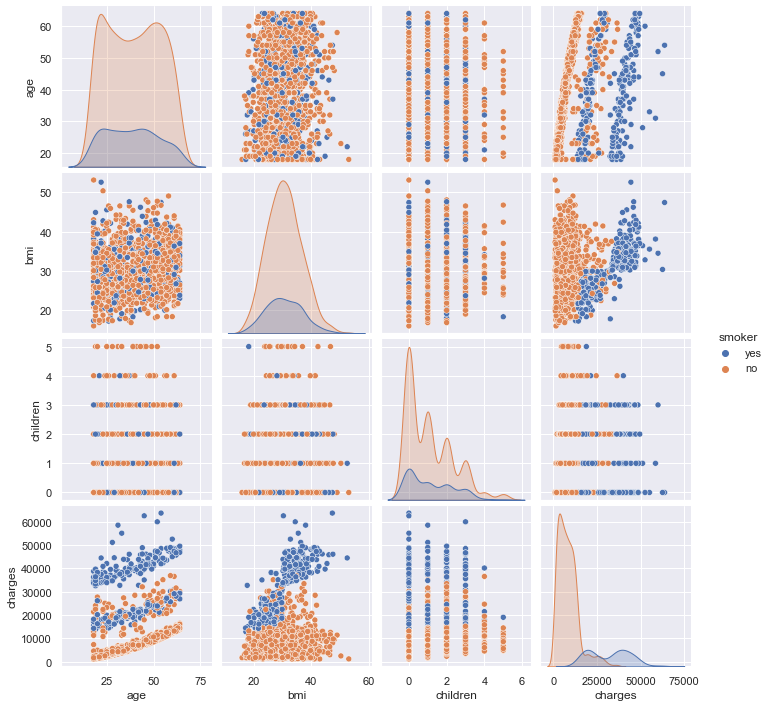

In [20]:
sns.pairplot(data=med, kind='scatter', hue='smoker')

The perecentage of smokers greatly affects these dataset than any other categorical data , which shows its importance in extracting the required results

### Distribution of BMI

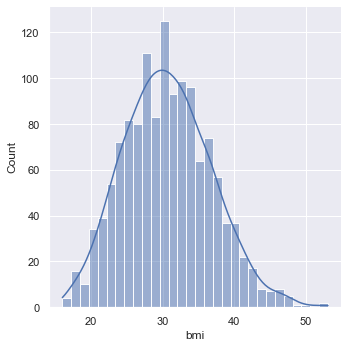

In [13]:
sns.displot(med, x="bmi", kde=True, bins = 30)

The BMI is evenly distributed with few outliers

 ### Relationship between smokers and charges

In [15]:
med.groupby("smoker")["charges"].mean()

smoker
no      8434.268298
yes    32050.231832
Name: charges, dtype: float64

clearly the average charges for smokers is approximately four times the average charges for non-smokers.

<AxesSubplot:xlabel='smoker', ylabel='charges'>

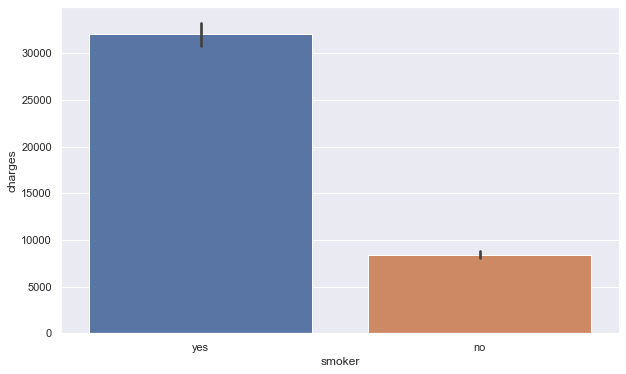

In [16]:
sns.barplot(data= med, x= "smoker", y= "charges")

<AxesSubplot:xlabel='charges', ylabel='Count'>

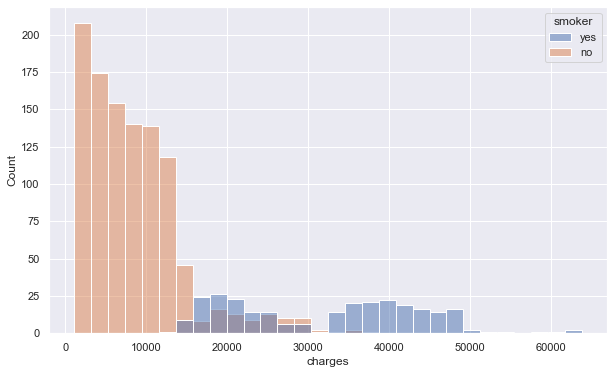

In [26]:
 sns.histplot(data= med, x = "charges",  hue = "smoker")

smokers incur more chargers

### Relationship between smokers and Region

In [28]:
med.groupby(["region", "smoker"]).agg({"smoker":"count"})

smoker
region    smoker        
northeast no         257
          yes         67
northwest no         267
          yes         58
southeast no         273
          yes         91
southwest no         267
          yes         58

<AxesSubplot:xlabel='region', ylabel='count'>

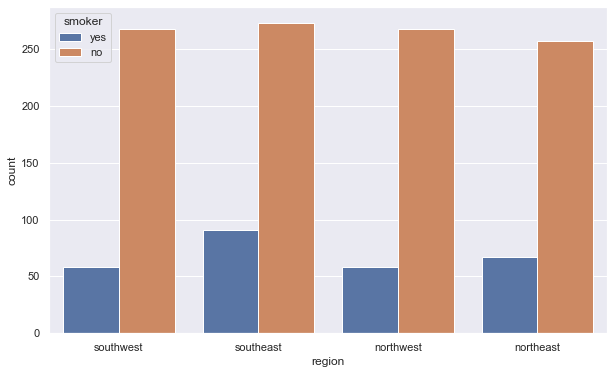

In [30]:
sns.countplot(data= med, x= "region", hue= "smoker")

the southeast have the most numbers of smokers

### Relationship between BMI and Sex

In [32]:
med.groupby("sex").agg({"bmi" :"mean"})

,bmi
sex,
female,30.377749
male,30.943129


<AxesSubplot:xlabel='bmi', ylabel='Density'>

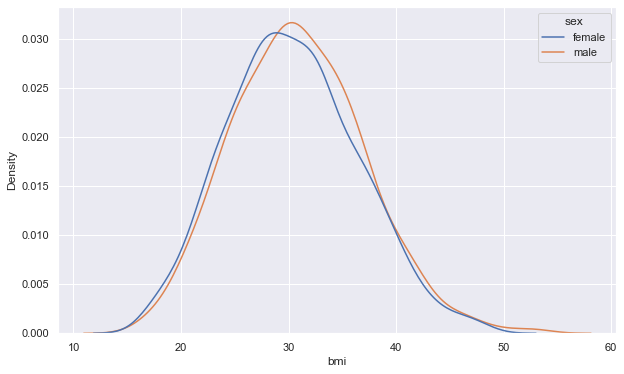

In [33]:
sns.kdeplot(data=med, x= "bmi", hue= "sex")

there isnt much difference between the BMI of females and men

### Region with the most number of children

In [36]:
med.groupby("region")[["children"]].sum()

,children
region,
northeast,339
northwest,373
southeast,382
southwest,371


<AxesSubplot:xlabel='region', ylabel='children'>

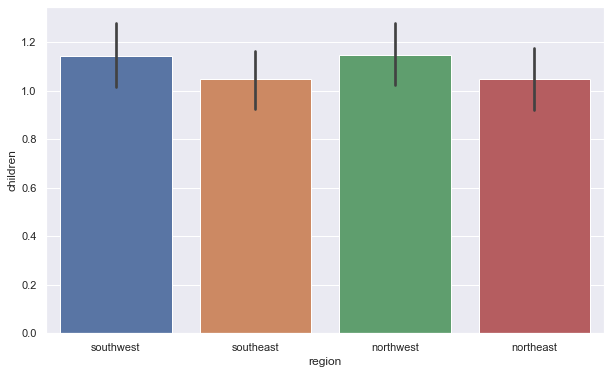

In [37]:
sns.barplot(data=med, x="region", y="children")

southwest have the most children

### Relationship Between Age and BMI

lets divide the ages into three category 

In [41]:

max_age = med['age'].max()
min_age = med['age'].min()
bins = [min_age, 35, 45, max_age]
labels = ['Youth', 'Middle Age', 'Old']
med['age_group'] = pd.cut(x = med['age'], bins = bins, labels = labels, include_lowest = True)

In [42]:
med.head()

,age,sex,bmi,children,smoker,region,charges,age_group
0,19,female,27.900,0,yes,southwest,16884.92400,Youth
1,18,male,33.770,1,no,southeast,1725.55230,Youth
2,28,male,33.000,3,no,southeast,4449.46200,Youth
3,33,male,22.705,0,no,northwest,21984.47061,Youth
4,32,male,28.880,0,no,northwest,3866.85520,Youth


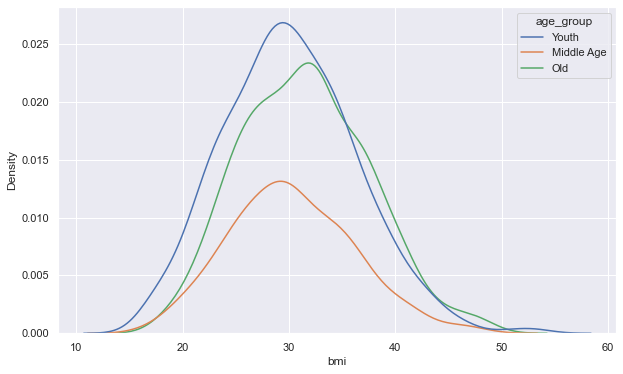

In [54]:
sns.kdeplot(x = 'bmi', data = med, hue = 'age_group');

majority of youths falls within the Average BMI

<Figure size 1008x432 with 0 Axes>

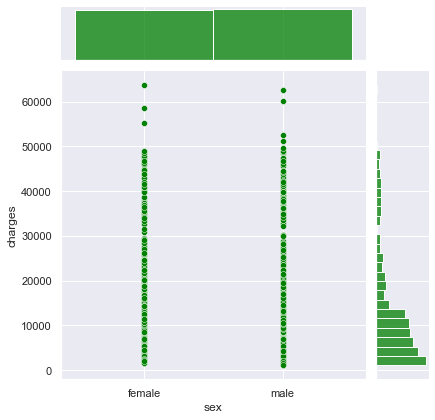

In [79]:
p= plt.figure(figsize=(14,6))
sns.jointplot(x='sex',y='charges',data=med,color="Green")

From left plot, insurance charges of male and female is almost same

### Relationship Between BMI and Children

<AxesSubplot:xlabel='bmi', ylabel='Count'>

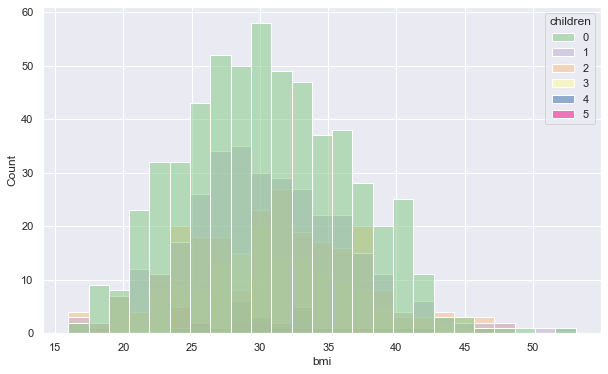

In [56]:
sns.histplot(data= med, x = "bmi", hue ="children", palette = "Accent")

### Is There An Outlier In Bmi?

<AxesSubplot:xlabel='bmi'>

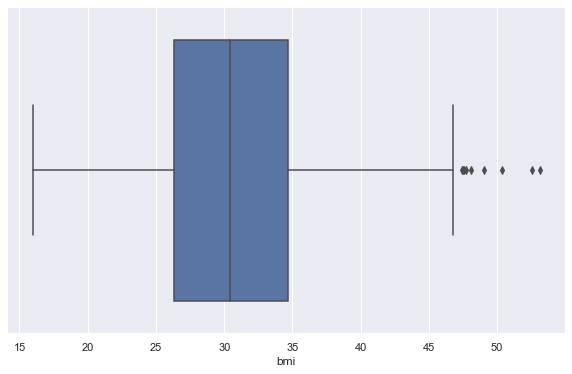

In [58]:
sns.boxplot(data= med ,x="bmi")

yes there are outliers exceeding the 45 mark 

### Relationship Between Bmi and Charges

the higher your BMI the more the charges

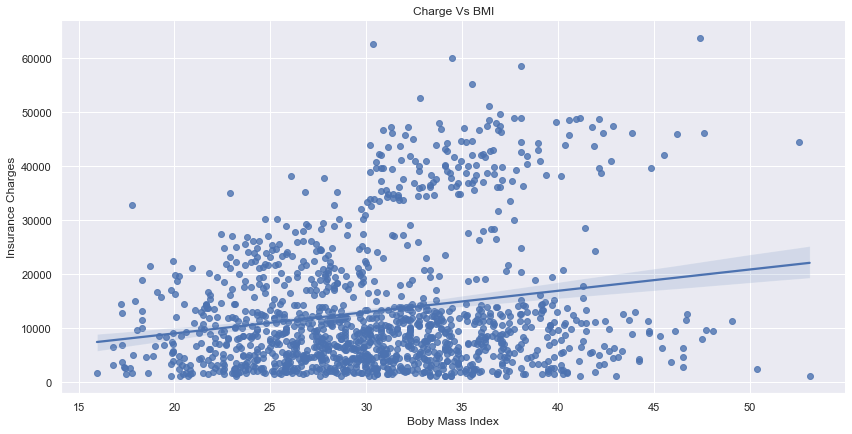

In [78]:
sns.lmplot(x='bmi',y='charges',data=med,aspect=2,height=6)
plt.xlabel('Boby Mass Index')
plt.ylabel('Insurance Charges')
plt.title('Charge Vs BMI');

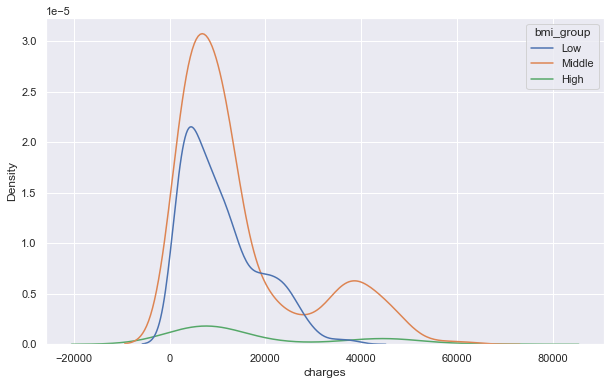

In [77]:
max_age = med['bmi'].max()
min_age = med['bmi'].min()
bins = [min_age,28, 41, max_age]
labels = ['Low', 'Middle', 'High']
med['bmi_group'] = pd.cut(x = med['bmi'], bins = bins, labels = labels, include_lowest = True)

# visualize
sns.kdeplot(x = 'charges', data = med , hue = 'bmi_group');

In [72]:
med_smokers=med.groupby(["region","smoker"])[["bmi"]].sum().reset_index()

<AxesSubplot:xlabel='region', ylabel='bmi'>

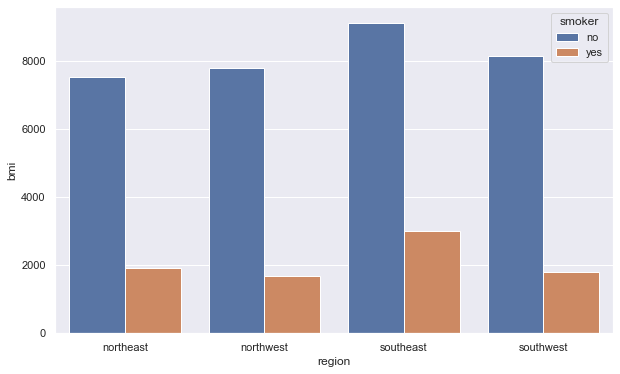

In [74]:
sns.barplot(data=med_smokers, x= "region", y= "bmi", hue= "smoker")

 there are more smokers in the southeast and their sum bmi is the highest

### Feature engineering

In [80]:
med.replace({'sex':{'male':0,'female':1}},inplace=True)
med.replace({'smoker':{'yes':0,'no':1}},inplace=True)
med.replace({'region':{'southeast':0,'southwest':1,"northeast":2,"northwest":3}},inplace=True)

### Model

In [91]:
X=med[['age','sex','bmi','children','smoker','region']]
Y=med['charges']

In [92]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.3)

In [93]:
print(X.shape, X_train.shape, X_test.shape)

(1338, 6) (936, 6) (402, 6)


In [94]:
regressor=LinearRegression()

In [95]:
regressor.fit(X_train,Y_train)

LinearRegression()

In [96]:
trainingdataprediction=regressor.predict(X_train)

In [97]:
r2=metrics.r2_score(Y_train,trainingdataprediction)
print("R square : ",r2)

R square :  0.7449178560626246


In [98]:
test_predict=regressor.predict(X_test)

In [99]:
input_data = (31,1,25.74,0,1,0)

# changing input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = regressor.predict(input_data_reshaped)
print(prediction)


[3791.54495402]
